## Build Precision Recall Curve: 
## Comparing SPRAS hiv05 ensemble pathway max node frequency & KEGG Pathways

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

### Load the ensemble-max frequency CSV

In [2]:
ensemble05_df = pd.read_csv("hiv_processed_data/hiv05-max-node-freq-ensemble.csv")
ensemble05_df.head()

,Node,max_freq
0,1433B_HUMAN,0.16
1,1433E_HUMAN,0.16
2,1433G_HUMAN,0.16
3,1433S_HUMAN,0.12
4,1433T_HUMAN,0.16


In [3]:
len(ensemble05_df)

1237

### Building PRC with KEGG -> SwissProt mapping

Build vector of 0s and 1s that are labels that indicate whether the SPRAS ensemble pathway is in the KEGG pathway or not

In [4]:
kegg_swissprot_proteins_path = "hiv_processed_data/kegg-orthology_hsa_swissprot_mapping_ko03250.csv"
kegg_swissprot_proteins_df = pd.read_csv(kegg_swissprot_proteins_path, sep=',')
kegg_swissprot_proteins_df.head()

,KEGG_Orthology,HSA,Uniprot,link_category
0,K25057,hsa:11168,up:O75475,equivalent
1,K12183,hsa:7251,up:Q99816,equivalent
2,K12194,hsa:29082,up:Q9BY43,equivalent
3,K12195,hsa:79643,up:Q96FZ7,equivalent
4,K12200,hsa:10015,up:Q8WUM4,equivalent


In [5]:
kegg_swissprot_proteins_df['Uniprot'] = kegg_swissprot_proteins_df['Uniprot'].str.replace('up:', '')
kegg_swissprot_proteins_df['Uniprot'] = kegg_swissprot_proteins_df['Uniprot'] + '_HUMAN'
kegg_swissprot = kegg_swissprot_proteins_df.copy().drop(columns = ['KEGG_Orthology', 'HSA', 'link_category'])
kegg_swissprot_list = kegg_swissprot['Uniprot'].tolist()
len(kegg_swissprot_list)

44

In [6]:
list(set(kegg_swissprot_list) & set(ensemble05_df['Node']))

[]

The empty list shows that there is no overlap of proteins with the KEGG -> SwissProt mapping (1-to-1)

### Build PRC with KEGG -> Uniprot mapping (1-to-many mapping for same proteins)

There are the same proteins in the previous mapping dataframe, but accounts for ALL Uniprot names of the KEGG proteins.

In [7]:
kegg_uniprot_proteins_path = "hiv_processed_data/kegg-orthology_hsa_uniprot_mapping_ko03250.csv"
kegg_uniprot_proteins_df = pd.read_csv(kegg_uniprot_proteins_path, sep=',')
kegg_uniprot_proteins_df.head()

,KEGG_Orthology,HSA,Uniprot,link_category
0,K25057,hsa:11168,up:O75475,equivalent
1,K12183,hsa:7251,up:Q99816,equivalent
2,K12194,hsa:29082,up:Q9BY43,equivalent
3,K12195,hsa:79643,up:Q96FZ7,equivalent
4,K12200,hsa:10015,up:Q8WUM4,equivalent


In [8]:
kegg_uniprot_proteins_df['Uniprot'] = kegg_uniprot_proteins_df['Uniprot'].str.replace('up:', '')
kegg_uniprot_proteins_df['Uniprot'] = kegg_uniprot_proteins_df['Uniprot'] + '_HUMAN'
kegg_uniprot = kegg_uniprot_proteins_df.copy().drop(columns = ['KEGG_Orthology', 'HSA', 'link_category'])
kegg_uniprot_list = kegg_uniprot['Uniprot'].tolist()
len(kegg_uniprot_list)

59

In [9]:
both_kegg_ensemble = list(set(kegg_uniprot_list) & set(ensemble05_df['Node']))
both_kegg_ensemble

[]

In [10]:
prc_df = ensemble05_df.copy()
prc_df['y_kegg'] = 0
prc_df.loc[prc_df['Node'].isin(both_kegg_ensemble), 'y_kegg'] = 1
prc_df.head()

,Node,max_freq,y_kegg
0,1433B_HUMAN,0.16,0
1,1433E_HUMAN,0.16,0
2,1433G_HUMAN,0.16,0
3,1433S_HUMAN,0.12,0
4,1433T_HUMAN,0.16,0


In [11]:
# extract needed columns from df
y_true = prc_df['y_kegg'].to_numpy()
y_scores = prc_df['max_freq'].to_numpy()

##### Actual Precision Recall Curve:

In [12]:
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = average_precision_score(y_true, y_scores)
print(auc_precision_recall)

-0.0


C:\Users\sumed\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sumed\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


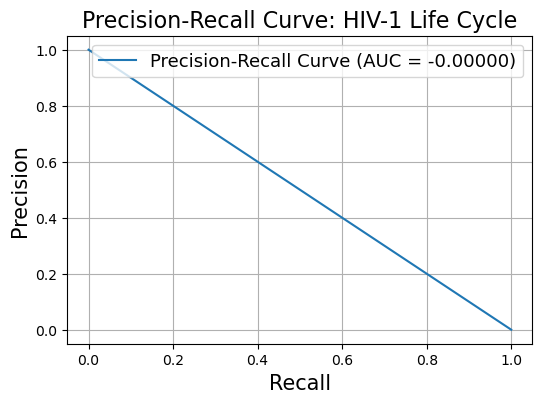

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_precision_recall:.5f})')
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.title('Precision-Recall Curve: HIV-1 Life Cycle', fontsize=16)
plt.legend(loc='best', fontsize=13)
plt.grid(True)
plt.show()

##### Dummy Precision Recall Curve

In [14]:
# create new column called y scores dummy - make it np array of val 0.5 repeated for length of y scores 
y_scores_dummy = np.full(len(prc_df), 0.5)

In [15]:
precision, recall, thresholds = precision_recall_curve(y_true, y_scores_dummy)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = average_precision_score(y_true, y_scores_dummy) 
print(auc_precision_recall)

-0.0


C:\Users\sumed\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\sumed\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


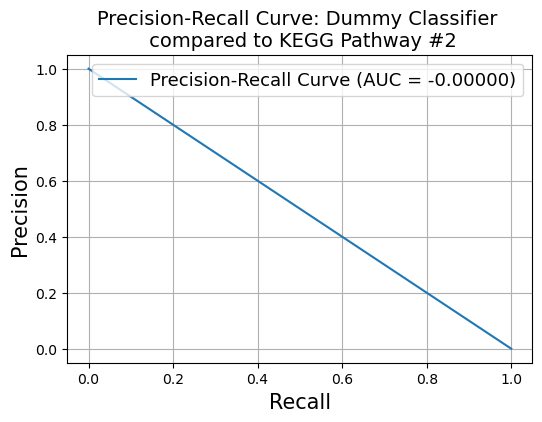

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_precision_recall:.5f})')
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.title('Precision-Recall Curve: Dummy Classifier \n compared to KEGG Pathway #2', fontsize=14)
plt.legend(loc='best', fontsize=13)
plt.grid(True)
plt.show()

- took two most relevant pathways hoping for overlap 
- hard to see if we're getting reasonable pathways
- same challenges in original study
- due to lack of gold standard
- kegg is not going to be useful to find gold standard